In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

#load and merge data

df1 = pd.read_csv('/Users/Maxim/Desktop/Data_Mining/Project/Data/historical_data1_2008/historical_data1_Q42008/historical_data1_Q42008.txt', low_memory=False, sep="|", header=None, \
                  names=['1. creditScore', '2. FirstPayment', '3. FirstTimeHomebuyer', '4. Maturity', '5. MetropolitanArea', '6. MorgageInsurancePercentage', '7. HouseUnits', '8. OccupancyStatus', '9. CombinedLoanToValue','10. DebtToIncome', '11. UPB', '12. OriginalLoanToValue', '13. OrigninalInterestRate', '14. Channel', '15. PrepaymentPenaltyMorgageFlag', '16. ProductType', '17. PropertyState', '18. PropertyType', '19. ZipCode', 'LoanSequenceNumber', '21. LoanPurpose', '22. OriginalLoanTerm', '23. NumberOfBorrowers', '24. SellerName', '25. ServiceName', '26. SuperConformFlag', '27. preHARPP'])
                  # dtypes={'1. creditScore': np.int})
df1.replace('',np.NaN)
df1.replace('NaN',np.NaN)

df2 = pd.read_csv('/Users/Maxim/Desktop/Data_Mining/Project/Data/historical_data1_2008/historical_data1_Q42008/historical_data1_time_Q42008.txt', low_memory=False, sep="|", header=None, names=['LoanSequenceNumber', '2. MonthlyReportingPeriod', '3. CurrentActualUPB', '4. CurrentLoanDeliquencyStatus', '5. LoanAge', '6. MonthsToLegalMaturity', '7. RepurchaseFlag', '8. ModificationFlag', '9. ZeroBalanceCode', '10. ZeroBalanceEffectiveDate', '11. CurrentInterestRate', '12. CurrentDefferedUPB', '13. DueDateLastOfPaidInstallment', '14. MorgageInsuranceRecoveries', '15. NetSalesProceeds', '16. NonMorgageInsuranceRecoveries', '17. Expenses', '18. LegalCosts', '19. MaintenanceAndPreservationCosts','20. TaxesAndInsurance', '21. MiscellaneousExpenses', '22. ActualLoss', '23. ModificationCosts'])
df2.replace('',np.NaN)
df2.replace('NaN',np.NaN)

df = pd.merge(df1, df2, how='right', on = 'LoanSequenceNumber')

'''
display(df1.dtypes)
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    display(df1, df2)
'''


/Users/Maxim/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


"\ndisplay(df1.dtypes)\nwith pd.option_context('display.max_rows', 10, 'display.max_columns', None):\n    display(df1, df2)\n"

In [2]:
# Removing columns
df = pd.merge(df1, df2, how='right', on = 'LoanSequenceNumber')
df.drop(df.columns[len(df.columns)-11:len(df.columns)], axis=1, inplace=True)
df.drop(['8. OccupancyStatus', '14. Channel', '15. PrepaymentPenaltyMorgageFlag', '16. ProductType', '21. LoanPurpose', '24. SellerName', '25. ServiceName', '26. SuperConformFlag', '27. preHARPP', '6. MonthsToLegalMaturity', '7. RepurchaseFlag', '12. CurrentDefferedUPB'], 1, inplace=True)

'''with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    display(df)'''

"with pd.option_context('display.max_rows', 100, 'display.max_columns', None):\n    display(df)"

In [3]:
# Get delinquent observations
some_values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
default = df['4. CurrentLoanDeliquencyStatus'].isin(some_values)
df['default'] = default



with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    display(df)


,1. creditScore,2. FirstPayment,3. FirstTimeHomebuyer,4. Maturity,5. MetropolitanArea,6. MorgageInsurancePercentage,7. HouseUnits,9. CombinedLoanToValue,10. DebtToIncome,11. UPB,12. OriginalLoanToValue,13. OrigninalInterestRate,17. PropertyState,18. PropertyType,19. ZipCode,LoanSequenceNumber,22. OriginalLoanTerm,23. NumberOfBorrowers,2. MonthlyReportingPeriod,3. CurrentActualUPB,4. CurrentLoanDeliquencyStatus,5. LoanAge,8. ModificationFlag,9. ZeroBalanceCode,10. ZeroBalanceEffectiveDate,11. CurrentInterestRate,default
0,736,200812,N,203811,NaN,0,1,80.0,20,172000,80.0,6.250,MI,SF,49700.0,F108Q4000001,360,2.0,200811,172000.00,0,0,NaN,NaN,NaN,6.250,False
1,736,200812,N,203811,NaN,0,1,80.0,20,172000,80.0,6.250,MI,SF,49700.0,F108Q4000001,360,2.0,200812,172000.00,0,1,NaN,NaN,NaN,6.250,False
2,736,200812,N,203811,NaN,0,1,80.0,20,172000,80.0,6.250,MI,SF,49700.0,F108Q4000001,360,2.0,200901,172000.00,0,2,NaN,NaN,NaN,6.250,False
3,736,200812,N,203811,NaN,0,1,80.0,20,172000,80.0,6.250,MI,SF,49700.0,F108Q4000001,360,2.0,200902,172000.00,0,3,NaN,NaN,NaN,6.250,False
4,736,200812,N,203811,NaN,0,1,80.0,20,172000,80.0,6.250,MI,SF,49700.0,F108Q4000001,360,2.0,200903,171000.00,0,4,NaN,NaN,NaN,6.250,False
5,736,200812,N,203811,NaN,0,1,80.0,20,172000,80.0,6.250,MI,SF,49700.0,F108Q4000001,360,2.0,200904,171000.00,0,5,NaN,NaN,NaN,6.250,False
6,736,200812,N,203811,NaN,0,1,80.0,20,172000,80.0,6.250,MI,SF,49700.0,F108Q4000001,360,2.0,200905,0.00,0,6,NaN,1.0,200905.0,6.250,False
7,797,200902,N,203901,38860.0,0,1,62.0,31,215000,62.0,5.625,ME,SF,4000.0,F108Q4000002,360,1.0,200901,215000.00,0,0,NaN,NaN,NaN,5.625,False
8,797,200902,N,203901,38860.0,0,1,62.0,31,215000,62.0,5.625,ME,SF,4000.0,F108Q4000002,360,1.0,200902,215000.00,0,1,NaN,NaN,NaN,5.625,False
9,797,200902,N,203901,38860.0,0,1,62.0,31,215000,62.0,5.625,ME,SF,4000.0,F108Q4000002,360,1.0,200903,214000.00,0,2,NaN,NaN,NaN,5.625,False


In [4]:
display(df.dtypes)

1. creditScore                     object
2. FirstPayment                     int64
3. FirstTimeHomebuyer              object
4. Maturity                         int64
5. MetropolitanArea               float64
6. MorgageInsurancePercentage       int64
7. HouseUnits                       int64
9. CombinedLoanToValue            float64
10. DebtToIncome                   object
11. UPB                             int64
12. OriginalLoanToValue           float64
13. OrigninalInterestRate         float64
17. PropertyState                  object
18. PropertyType                   object
19. ZipCode                       float64
LoanSequenceNumber                 object
22. OriginalLoanTerm                int64
23. NumberOfBorrowers             float64
2. MonthlyReportingPeriod           int64
3. CurrentActualUPB               float64
4. CurrentLoanDeliquencyStatus     object
5. LoanAge                          int64
8. ModificationFlag                object
9. ZeroBalanceCode                

In [5]:
logdf = df
logdf['1. creditScore'].replace('   ', np.NaN, inplace=True)
a = logdf['1. creditScore'].isnull()
# a = logdf.loc[df['1. creditScore'] == isnull]
display(logdf[a])

,1. creditScore,2. FirstPayment,3. FirstTimeHomebuyer,4. Maturity,5. MetropolitanArea,6. MorgageInsurancePercentage,7. HouseUnits,9. CombinedLoanToValue,10. DebtToIncome,11. UPB,...,23. NumberOfBorrowers,2. MonthlyReportingPeriod,3. CurrentActualUPB,4. CurrentLoanDeliquencyStatus,5. LoanAge,8. ModificationFlag,9. ZeroBalanceCode,10. ZeroBalanceEffectiveDate,11. CurrentInterestRate,default
255219,NaN,200812,N,203811,42644.0,0,1,36.0,24,417000,...,1.0,200811,417000.00,0,0,NaN,NaN,NaN,5.50,False
255220,NaN,200812,N,203811,42644.0,0,1,36.0,24,417000,...,1.0,200812,416000.00,0,1,NaN,NaN,NaN,5.50,False
255221,NaN,200812,N,203811,42644.0,0,1,36.0,24,417000,...,1.0,200901,415000.00,0,2,NaN,NaN,NaN,5.50,False
255222,NaN,200812,N,203811,42644.0,0,1,36.0,24,417000,...,1.0,200902,414000.00,0,3,NaN,NaN,NaN,5.50,False
255223,NaN,200812,N,203811,42644.0,0,1,36.0,24,417000,...,1.0,200903,413000.00,0,4,NaN,NaN,NaN,5.50,False
255224,NaN,200812,N,203811,42644.0,0,1,36.0,24,417000,...,1.0,200904,412000.00,0,5,NaN,NaN,NaN,5.50,False
255225,NaN,200812,N,203811,42644.0,0,1,36.0,24,417000,...,1.0,200905,411000.00,0,6,NaN,NaN,NaN,5.50,False
255226,NaN,200812,N,203811,42644.0,0,1,36.0,24,417000,...,1.0,200906,410212.22,0,7,NaN,NaN,NaN,5.50,False
255227,NaN,200812,N,203811,42644.0,0,1,36.0,24,417000,...,1.0,200907,409224.68,0,8,NaN,NaN,NaN,5.50,False
255228,NaN,200812,N,203811,42644.0,0,1,36.0,24,417000,...,1.0,200908,408232.61,0,9,NaN,NaN,NaN,5.50,False


In [6]:
display(df.dtypes)

1. creditScore                     object
2. FirstPayment                     int64
3. FirstTimeHomebuyer              object
4. Maturity                         int64
5. MetropolitanArea               float64
6. MorgageInsurancePercentage       int64
7. HouseUnits                       int64
9. CombinedLoanToValue            float64
10. DebtToIncome                   object
11. UPB                             int64
12. OriginalLoanToValue           float64
13. OrigninalInterestRate         float64
17. PropertyState                  object
18. PropertyType                   object
19. ZipCode                       float64
LoanSequenceNumber                 object
22. OriginalLoanTerm                int64
23. NumberOfBorrowers             float64
2. MonthlyReportingPeriod           int64
3. CurrentActualUPB               float64
4. CurrentLoanDeliquencyStatus     object
5. LoanAge                          int64
8. ModificationFlag                object
9. ZeroBalanceCode                

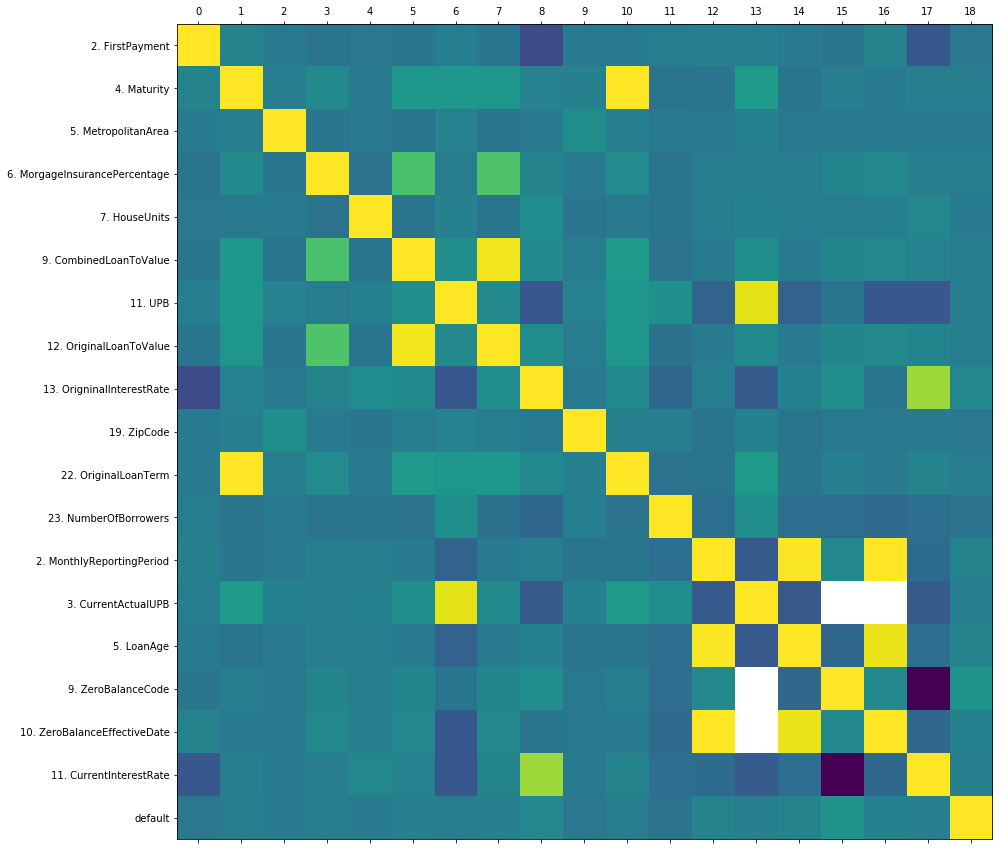

In [7]:
df = df.reset_index(drop=True)
size = 15
corr = df.corr()
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), range(len(corr.columns)));
plt.yticks(range(len(corr.columns)), corr.columns);
plt.show()

fig = ax.get_figure()


In [8]:
#run logistic regression of iRate and hUnits on default


X = df.loc[:, ['13. OrigninalInterestRate', '11. UPB']]
y = df['default']
logit_model=sm.Logit(y,X.astype(float))
result=logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.109099
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:              8434837
Model:                          Logit   Df Residuals:                  8434835
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 Apr 2018   Pseudo R-squ.:                -0.07096
Time:                        17:35:39   Log-Likelihood:            -9.2023e+05
converged:                       True   LL-Null:                   -8.5925e+05
                                        LLR p-value:                     1.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
13. OrigninalInterestRate    -0.6079      0.001   -771.597      0.000      -0.

In [9]:
# create df of zipCodes, default status, and LoadID
import zipcode

d = df.loc[:, ['LoanSequenceNumber', 'default']]

x = pd.merge(df1, d, on = 'LoanSequenceNumber')
x = x.loc[:, ['5. MetropolitanArea', 'default', 'LoanSequenceNumber', '17. PropertyState']]
x = x.dropna(axis =0)
x['5. MetropolitanArea']= x['5. MetropolitanArea'].astype(str).str[:-2]
x.drop_duplicates(subset='LoanSequenceNumber', inplace=True)
x = x.dropna(axis =0)
display(x)

,5. MetropolitanArea,default,LoanSequenceNumber,17. PropertyState
7,38860,False,F108Q4000002,ME
68,20260,False,F108Q4000005,WI
106,12060,False,F108Q4000006,GA
176,36980,False,F108Q4000007,KY
333,41180,False,F108Q4000010,MO
610,31740,False,F108Q4000017,KS
615,45820,False,F108Q4000018,KS
621,22420,False,F108Q4000019,MI
944,28140,False,F108Q4000024,MO
1036,12060,False,F108Q4000025,GA


In [10]:
# create state column
'''
from pyzipcode import Pyzipcode as pz

states = []
for i,row in x.iterrows():
    try:
        z = zipcode.isequal(row[0])
        s = z.state
        states.append(s)
    except:
        try:
            myzip = zipcode.isequal('44102')
            s = myzip.state 
            states.append(s)
        except:
            states.append(np.NaN)
x['state'] = states
'''
x = x.dropna(axis =0)
x = x.reset_index(drop=True)

In [11]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    display(x)
    

,5. MetropolitanArea,default,LoanSequenceNumber,17. PropertyState
0,38860,False,F108Q4000002,ME
1,20260,False,F108Q4000005,WI
2,12060,False,F108Q4000006,GA
3,36980,False,F108Q4000007,KY
4,41180,False,F108Q4000010,MO
5,31740,False,F108Q4000017,KS
6,45820,False,F108Q4000018,KS
7,22420,False,F108Q4000019,MI
8,28140,False,F108Q4000024,MO
9,12060,False,F108Q4000025,GA


In [12]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [13]:
#rename state column from abbreviation to full name
States = np.unique(x['17. PropertyState'].tolist(), return_counts=True)
States = dict(zip(States[0], States[1]))
for j in states:
    for i in States:
        if j == i:
            new_key = states[j]
            old_key = i
            States[new_key] = States.pop(old_key)


In [14]:
print(States)

{'Alaska': 343, 'Alabama': 1956, 'Arkansas': 927, 'Arizona': 4687, 'California': 26033, 'Colorado': 4885, 'Connecticut': 1851, 'District of Columbia': 452, 'Delaware': 458, 'Florida': 8865, 'Georgia': 5653, 'Hawaii': 651, 'Iowa': 1206, 'Idaho': 1077, 'Illinois': 11171, 'Indiana': 3400, 'Kansas': 1520, 'Kentucky': 2085, 'Louisiana': 1598, 'Massachusetts': 5553, 'Maryland': 4459, 'Maine': 644, 'Michigan': 3930, 'Minnesota': 3669, 'Missouri': 4889, 'Mississippi': 527, 'Montana': 311, 'North Carolina': 5824, 'North Dakota': 260, 'Nebraska': 694, 'New Hampshire': 707, 'New Jersey': 5055, 'New Mexico': 1056, 'Nevada': 1812, 'New York': 5796, 'Ohio': 3923, 'Oklahoma': 1548, 'Oregon': 3110, 'Pennsylvania': 6155, 'Puerto Rico': 64, 'Rhode Island': 600, 'South Carolina': 2847, 'South Dakota': 203, 'Tennessee': 2973, 'Texas': 11208, 'Utah': 3565, 'Virginia': 5811, 'Vermont': 248, 'Washington': 5808, 'Wisconsin': 4320, 'West Virginia': 464, 'Wyoming': 109}


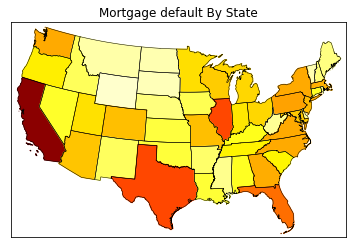

In [15]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
map.readshapefile('st99_d00', name='states', drawbounds=True)
cmap = plt.cm.hot
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 40000 # set range.
for shapedict in map.states_info:
    statename = shapedict['NAME']
    if statename in States:
        defaults = States[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((defaults-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance

for nshape,seg in enumerate(map.states):
    if statenames[nshape] in States:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Mortgage default By State')
plt.show()

In [16]:
# load economic state data

dfEcon = pd.read_csv('/Users/Maxim/Desktop/Data_Mining/Project/CA30/a.csv', low_memory=False, sep=",", header=None, names=['GeoFIPS','GeoName','Region','Table','LineCode','IndustryClassification','Description','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'])
dfEcon = dfEcon[1:-53][:]

In [63]:
# remove states not in our observations
count = 0
l = []
for i in dfEcon['GeoName']:
    if i not in States:
        l.append(False)
    else:
        l.append(True)
    count+=1
dfEcon = dfEcon[l]
dfEcon = dfEcon.reset_index(drop=True)


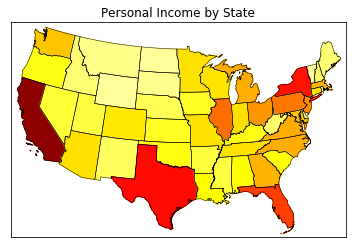

In [58]:
statesIncome = dfEcon[(dfEcon['Description'] == "Personal income (thousands of dollars)")]
personalIncome = statesIncome[['GeoName','2008']]

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
map.readshapefile('st99_d00', name='states', drawbounds=True)
cmap = plt.cm.hot
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 2500000000
i=0

for shapedict in map.states_info:
    try: 
        statename = shapedict['NAME']
        s = personalIncome[personalIncome['GeoName'] == statename]
        x = s['2008']
        
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((int(x)-vmin)/(vmax-vmin)))[:3]
        statenames.append(statename)
    except:
        pass
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance

for nshape,seg in enumerate(map.states):
    # skip DC and Puerto Rico.
    try: 
        if statenames[nshape] in States:
            color = rgb2hex(colors[statenames[nshape]]) 
            poly = Polygon(seg,facecolor=color,edgecolor=color)
            ax.add_patch(poly)
    except:
        pass
plt.title('Personal Income by State')
plt.show()

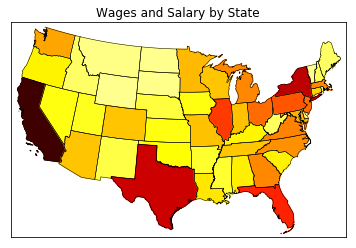

In [62]:
statesIncome = dfEcon[(dfEcon['Description'] == "    Wages and salaries")]
wages = statesIncome[['GeoName','2008']]



map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
map.readshapefile('st99_d00', name='states', drawbounds=True)
cmap = plt.cm.hot
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 1000000000
for shapedict in map.states_info:
    try:
        statename = shapedict['NAME']
        # skip DC and Puerto Rico.
        if statename in States:
            s = wages[wages['GeoName'] == statename]
            x = s['2008']
            # calling colormap with value between 0 and 1 returns
            # rgba value.  Invert color range (hot colors are high
            # population), take sqrt root to spread out colors more.
            colors[statename] = cmap(1.-np.sqrt((int(x)-vmin)/(vmax-vmin)))[:3]
        statenames.append(statename)
    except:
        pass
ax = plt.gca()

for nshape,seg in enumerate(map.states):
    try:
        if statenames[nshape] in States:
            color = rgb2hex(colors[statenames[nshape]]) 
            poly = Polygon(seg,facecolor=color,edgecolor=color)
            ax.add_patch(poly)
    except:
        pass
plt.title('Wages and Salary by State')
plt.show()

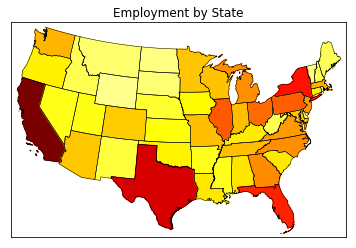

In [61]:
statesIncome = dfEcon[(dfEcon['Description'] == "Total employment (number of jobs)")]
employ = statesIncome[['GeoName','2008']]


map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
map.readshapefile('st99_d00', name='states', drawbounds=True)
cmap = plt.cm.hot
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 30000000
for shapedict in map.states_info:
    try:
        statename = shapedict['NAME']
        # skip DC and Puerto Rico.
        if statename in States:
            s = employ[employ['GeoName'] == statename]
            x = s['2008']
            # calling colormap with value between 0 and 1 returns
            # rgba value.  Invert color range (hot colors are high
            # population), take sqrt root to spread out colors more.
            colors[statename] = cmap(1.-np.sqrt((int(x)-vmin)/(vmax-vmin)))[:3]
        statenames.append(statename)
    except:
        pass
ax = plt.gca()

for nshape,seg in enumerate(map.states):
    try:
        if statenames[nshape] in States:
            color = rgb2hex(colors[statenames[nshape]]) 
            poly = Polygon(seg,facecolor=color,edgecolor=color)
            ax.add_patch(poly)
    except:
        pass
plt.title('Employment by State')
plt.show()


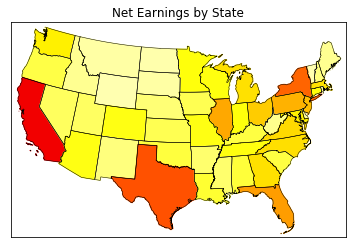

In [60]:
statesIncome = dfEcon[(dfEcon['Description'] == '  Net earnings by place of residence')]
net = statesIncome[['GeoName','2008']]


map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
map.readshapefile('st99_d00', name='states', drawbounds=True)
cmap = plt.cm.hot
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 2500000000
for shapedict in map.states_info:
    try:
        statename = shapedict['NAME']
        if statename in States:
            s = net[net['GeoName'] == statename]
            x = s['2008']
            # calling colormap with value between 0 and 1 returns
            # rgba value.  Invert color range (hot colors are high
            # population), take sqrt root to spread out colors more.
            colors[statename] = cmap(1.-np.sqrt((int(x)-vmin)/(vmax-vmin)))[:3]
        statenames.append(statename)
    except:
        pass
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance

for nshape,seg in enumerate(map.states):
    try:
        if statenames[nshape] in States:
            color = rgb2hex(colors[statenames[nshape]]) 
            poly = Polygon(seg,facecolor=color,edgecolor=color)
            ax.add_patch(poly)
    except:
        pass
plt.title('Net Earnings by State')
plt.show()

In [ ]:
dfEcon.iloc[12,6]

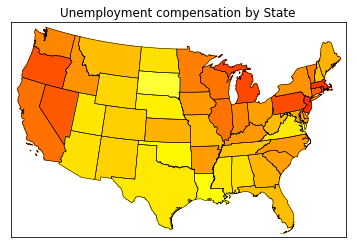

In [59]:
statesIncome = dfEcon[(dfEcon['Description'] == '    Per capita unemployment insurance compensation 4/')]
ins = statesIncome[['GeoName','2008']]


map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
map.readshapefile('st99_d00', name='states', drawbounds=True)
cmap = plt.cm.hot
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 1000
for shapedict in map.states_info:
    try: 
        statename = shapedict['NAME']
        if statename in States:
            s = ins[ins['GeoName'] == statename]
            x = s['2008']
            # calling colormap with value between 0 and 1 returns
            # rgba value.  Invert color range (hot colors are high
            # population), take sqrt root to spread out colors more.
            colors[statename] = cmap(1.-np.sqrt((int(x)-vmin)/(vmax-vmin)))[:3]
        statenames.append(statename)
    except:
        pass
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance

for nshape,seg in enumerate(map.states):
    try:
        if statenames[nshape] in States:
            color = rgb2hex(colors[statenames[nshape]]) 
            poly = Polygon(seg,facecolor=color,edgecolor=color)
            ax.add_patch(poly)
    except:
        pass
plt.title('Unemployment compensation by State')
plt.show()

'/Users/Maxim'